<a href="https://colab.research.google.com/github/Damien1026/cs412_toxic_detection/blob/main/412project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
datadir = "/content/"
youtube_df = pd.read_csv(datadir + 'youtoxic_english_1000.csv')
toxic_df = pd.read_csv(datadir + 'train.csv.zip')

Mounted at /content/drive


2.2 Initial Analysis On Our Datasets

In [ ]:
youtube_df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
youtube_df.shape

(1000, 15)

In [ ]:
toxic_df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
toxic_df.shape

(159571, 8)

2.3 Selecting The Required Columns

In [ ]:
#We are going to select just the "comment_text" and "toxic" columns
toxic_df['Toxic'] = toxic_df.iloc[:, 2:].any(axis = 1)
selected_toxic_columns = toxic_df[['comment_text', 'Toxic']]
selected_toxic_columns

,comment_text,Toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False
...,...,...
159566,""":::::And for the second time of asking, when ...",False
159567,You should be ashamed of yourself \n\nThat is ...,False
159568,"Spitzer \n\nUmm, theres no actual article for ...",False
159569,And it looks like it was actually you who put ...,False


In [ ]:
#We are going to select just the "Text" and "IsToxic" columns
youtube_df['Toxic'] = youtube_df.iloc[:, 3:].any(axis = 1)
selected_youtube_columns = youtube_df[['Text', 'Toxic']].rename(
    columns = {
        'Text' : 'comment_text'
    }
)
selected_youtube_columns

,comment_text,Toxic
0,If only people would just take a step back and...,False
1,Law enforcement is not trained to shoot to app...,True
2,\nDont you reckon them 'black lives matter' ba...,True
3,There are a very large number of people who do...,False
4,"The Arab dude is absolutely right, he should h...",False
...,...,...
995,I remember that they sent in the national defe...,False
996,Stats don`t represent the problem. Race baitin...,True
997,The quote from the mother... Wow that hit hard...,False
998,this video is so racist,False


2.4 Combining The Two Datasets

In [ ]:
#Let's combine the two DataFrames
combined_df = pd.concat([selected_toxic_columns, selected_youtube_columns], ignore_index = True)
combined_df.head()

,comment_text,Toxic
0,Explanation\nWhy the edits made under my usern...,False
1,D'aww! He matches this background colour I'm s...,False
2,"Hey man, I'm really not trying to edit war. It...",False
3,"""\nMore\nI can't make any real suggestions on ...",False
4,"You, sir, are my hero. Any chance you remember...",False


In [ ]:
combined_df.shape

(160571, 2)

In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160571 entries, 0 to 160570
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   comment_text  160571 non-null  object
 1   Toxic         160571 non-null  bool  
dtypes: bool(1), object(1)
memory usage: 1.4+ MB


In [ ]:
combined_df.describe()

,comment_text,Toxic
count,160571,160571
unique,160568,2
top,run them over,False
freq,3,143884


In [ ]:
combined_df.isnull().sum()

,0
comment_text,0
Toxic,0


2.5 Handling Duplicates

In [ ]:
#Checking duplicates
combined_df.duplicated(subset = ['comment_text'], keep = False).sum()

5

In [ ]:
#Printing the duplicated rows
duplicates = combined_df[combined_df.duplicated(subset = ['comment_text'], keep = False)]
duplicates

,comment_text,Toxic
160163,RUN THEM OVER,True
160213,run them over,True
160228,run them over,True
160248,run them over,True
160270,RUN THEM OVER,True


In [ ]:
#Dropping Duplicates
combined_df.drop_duplicates(subset = ['comment_text'], keep = 'first', inplace = True)

In [ ]:
#Confirm Drops
combined_df.duplicated(subset = ['comment_text'], keep = False).sum()

0

In [ ]:
combined_df['Toxic'].value_counts()

#We can see from the code above that the data is imbalanced.

,count
Toxic,
False,143884
True,16684


VISUALIZATION



3.1 Toxic vs Non-Toxic Comments Plot

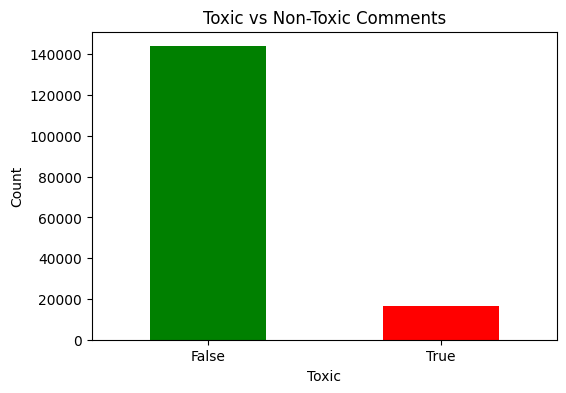

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#Graphical representation of the Toxic column values (Toxic vs Non-Toxic Comments) distribution
plt.figure(figsize = (6, 4))
toxic_counts = combined_df['Toxic'].value_counts()
toxic_counts.plot(kind = 'bar', color = ['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

3.2 Wordcloud for Toxic Comment

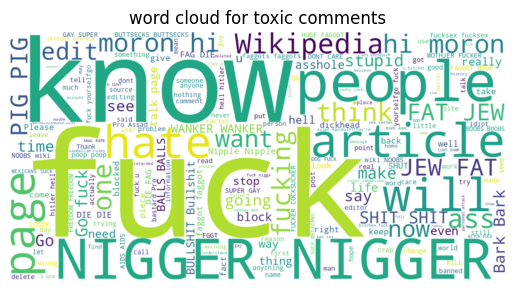

In [ ]:
from wordcloud import WordCloud
#Toxic Comments
toxic_comments = ''.join(combined_df[combined_df['Toxic']]['comment_text'])
toxic_words = WordCloud(width = 1600, height = 800, background_color = "white").generate(toxic_comments)
plt.imshow(toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("word cloud for toxic comments")
plt.show()

3.3 Wordcloud for Non-Toxic Comments

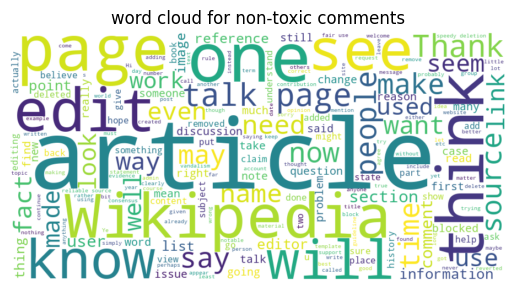

In [ ]:
#Non-Toxic
non_toxic_comments = ''.join(combined_df[~combined_df['Toxic']]['comment_text'])
non_toxic_words = WordCloud(width = 900, height = 450, background_color = "white").generate(non_toxic_comments)
plt.imshow(non_toxic_words, interpolation = 'bilinear')
plt.axis("off")
plt.title("word cloud for non-toxic comments")
plt.show()

EXPLORATORY DATA ANALYSIS (EDA)

4.1 Replacing True and False Values

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Replacing True as 1 and False as 0.
combined_df['Toxic'] = combined_df['Toxic'].replace({True: 1, False: 0})

4.2 Text Preprocessing

In [ ]:
#"re" is for regular expressions and text processing.
import re
#Cleaning the comment texts
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re'", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub("\W", " ", text)
    text = re.sub("\s+", " ", text)
    text = text.strip(" ")

    return text

combined_df['comment_text'] = combined_df['comment_text'].map(lambda cleaned : clean_text(cleaned))

In [ ]:
combined_df.head()

4.3 Text Processing Using TF-IDF

In [ ]:
"""TF-IDF(Term Frequency-Inverse Document Frequency) is used for text analysis:
Text to Numerical Conversion, Feature Extraction, Dimensionality Reduction, Normalization & Scaling etc."""

from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features = 5000, stop_words = 'english')
X = vector.fit_transform(combined_df['comment_text'])
Y = combined_df['Toxic']

4.4 Over-Sampling Using SMOTE

In [ ]:
combined_df['Toxic'].value_counts()

In [ ]:
#Recall that the data is imbalanced, so we have to balance it using SMOTE
"""SMOTE(Synthetic Minority Over-sampling Technique): It's a technique used in machine learning
in dealing with imbalanced data. Imbalanced Data is a data where one class is significantly
underrepresented, compared to another class. The latter is the the 'Minority Class', while
the former is the 'Majority Class'.

The minority class has fewer samples than the majority class and the imbalance can lead to
biased models that performs poorly on the minority class.

SMOTE generates synthetic samples for the minority class. It does this by creating new
instances or synthetic samples that are combinations of the existing minority class samples.
The samples are created by interpolating between existing minority class samples in the feature.

SMOTE selects pairs of similar instances from the minority class and creates synthetic
instances along the line segments joining these pairs. This process is known as
'Interpolation Technique', and the process effectively increases the number of samples in
the minority class, making it more balanced with the majority class.

The synthetic samples generated are created in a uniform way that maintains the distribution
and patterns of the minority class,thereby preventing overfitting and improving the
generalization of the machine learning model.
"""

from imblearn.over_sampling import SMOTE

#Initialize SMOTE
smote = SMOTE()

#Using SMOTE for oversampling
X_resampled, y_resampled = smote.fit_resample(X, Y)

#Converting oversampled data to DataFrame
resampled_df = pd.DataFrame(X_resampled.todense(), columns = vector.get_feature_names_out())
resampled_df['Toxic'] = y_resampled

In [ ]:
resampled_df['Toxic'].value_counts()

In [ ]:
#Plotting the new distribution sample
plt.figure(figsize = (6, 4))
toxic_counts = resampled_df['Toxic'].value_counts()
toxic_counts.plot(kind = 'bar', color = ['green', 'red'])
plt.title('Toxic vs Non-Toxic Comments')
plt.xlabel('Toxic')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.show()

MODELLING

5.1 Splitting Our Dataset

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the New Dataset into Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

5.2 Building Neural Network Model

In [ ]:
#"TensorFlow/keras" is for deep learning models
"""Neural Network Model with very few neurons ensures that the model is ligh-weighted,
and using a dropout of 0.5 helps prevent overfitting."""

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
#Neural Network Model
model = Sequential([
    Dense(64, activation = 'relu'),
    Dropout(0.5),
    Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

5.3 Training Our Model

In [ ]:
train_model = model.fit(X_train.toarray(), y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

5.4 Visualizing Our Model

5.4.1 Model Accuracy

In [ ]:
#Training vs Validation Accuracy
plt.figure(figsize = (6, 4))
plt.plot(train_model.history['accuracy'])
plt.plot(train_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

5.4.2 Model Loss

In [ ]:
#Training vs Validation Loss
plt.figure(figsize = (6, 4))
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc = 'upper left')
plt.show()

5.5 Model Accuracy Evaluation

In [ ]:
#Evaluating Model Accuracy On Test Data
"""Let's ensure that the model is not overfitting."""

loss, accuracy = model.evaluate(X_test, y_test)
print(f"The Test Accuracy is: {accuracy}")

In [ ]:
#Loss
print(f"The Model Loss is: {loss}")

In [ ]:
from sklearn.metrics import classification_report

#Predictions on Test Data
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

#Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

In [ ]:
import seaborn as sns

#Predictions on Test Data
#y_pred_prob = model.predict(X_test)
#y_pred = (y_pred_prob > 0.5).astype(int)

#Classification Report
class_report = classification_report(y_test, y_pred, output_dict = True)
class_report_df = pd.DataFrame(class_report).transpose()

#Dropping irrelevant metrics for Visualization
class_metrics = class_report_df.drop(['accuracy', 'macro avg', 'weighted avg'])

#Classification Metrics Using Heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(class_metrics[['precision', 'recall', 'f1-score']], annot = True, cmap = 'Reds', fmt = '.2f')
plt.title("Classification Report Metrics")
plt.xlabel("Metrics")
plt.ylabel("Class")
plt.yticks(rotation = 0)
plt.show()

5.6 Saving Our Model and Vectorizer

In [ ]:
#Saving the Keras Model
import pickle

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vector, f)

model.save('toxic_comment_prediction_model.h5')

5.7 Testing Our Saved Model

In [ ]:
#Reusing The Saved Model
import pickle
from tensorflow.keras.models import load_model
#Import TF-IDF Vectorizer for text handling
from sklearn.feature_extraction.text import TfidfVectorizer

#Loading TF-IDF Vectorizer
with open('/kaggle/working/tfidf_vectorizer.pkl', 'rb') as f:
    loaded_vectorizer = pickle.load(f)


#Loading The Trained Model
loaded_model = load_model('/kaggle/working/toxic_comment_prediction_model.h5')
new_comments = [
    "You're quite a bad person at keeping to time.",
    "This is a very bad service.",
    "You’ve achieved so much!",
    "You are very stupid and mad.",
]

#Processing New Comments using the Loaded TF-IDF Vectorizer
processed_comment = loaded_vectorizer.transform(new_comments)

#Predicting using the Loaded Model
predictions = (loaded_model.predict(processed_comment) > 0.5).astype(int)

#Prediction Result
for comment, prediction in zip(new_comments, predictions):
    print(f"Comment: {comment} | Is Toxic: {bool(prediction)}")

NameError: name 'output' is not defined